# Titanic - Machine Learning from Disaster

## Abstract

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This project will try to answer the question: “what sorts of people were more likely to survive?” using passenger data (e.g. name, age, gender, socio-economic class, etc).

## Main Objective of the Analysis

The main objective of the analysis is to interpret the features in the dataset, which can be used to build the most accurate predictive model based on the classification algorithms.

## Brief Description of the Data

The data was taken from [Kaggle](https://www.kaggle.com/c/titanic/data) and it consists of two separated datasets:
1. Training dataset contains the 891 observations of Titanic passengers and 12 features (including target feature) as described in Table 1
2. Testing dataset contains the 418 observations of Titanic passengers and the same 11 features (without target feature) as in Train dataset

| Column | Description |
| --- | --- |
| PassengerId |  Passenger ID |
| Survived |  Survival: 0 = No, 1 = Yes |
| Pclass |  Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |
| Sex | Sex: Female, Male |
| Age | Age of the passenger in years |
| SibSp | Number of siblings / spouses aboard the Titanic |
| Parch | Number of parents / children aboard the Titanic |
| Ticket | Ticket number |
| Fare | Passenger fare |
| Cabin | Cabin number |
| Embarked | Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton |

## Project Workflow:
1. Importing Libraries
2. Loading the Datasets
3. Data Summary
4. Data Wrangling, Exploratory Data Analysis and Feature Engineering
  - Provide the summary statistics of numerical and categorical features
  - Perform data wrangling and data cleaning: fill missing values in training and testing datasets and drop unnecessary features
  - Analyze and visualize the impact of the numerical and categorical features on the target feature
  - Combine similar features into a new feature
  - Encode the categorical features
5. Modeling, Prediction and Interpretation
  - Define the independent variables and dependent variable for the training
  - Use 5 classification algorithms for training:
    - Logistic Regression
    - Support Vector Machine
    - K-Nearest Neighbors
    - Decision Tree
    - Random Forest
  - Make prediction fitting the testing data into the best model
  - Interpret the features

## 1. Importing Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fast')

import seaborn as sns
sns.set(style='darkgrid', context='notebook', palette='tab10')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings as wn
wn.filterwarnings('ignore')

## 2. Loading the Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Combine the datasets to perform certain operations on both datasets together
data = [train, test]

## 3. Data Summary

In [3]:
# Examine the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Examine the testing dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# Check for the null values in training dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Check for the null values in testing dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 4. Data Wrangling, Exploratory Data Analysis and Feature Engineering

### Summary Statistics

In [7]:
# Examine the summary statistics of the numerical features
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# Examine the summary statistics of the categorical features
train.describe(include=np.object).T

,count,unique,top,freq
Name,891,891,"Moore, Mr. Leonard Charles",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### Data Wrangling

- Filling missing values in Age feature in the training and testing datasets
- Filling missing values in Embarked feature in the training dataset
- Filling missing value in Fare feature in the testing dataset
- Dropping unnecessary features such as PassengerId, Name, Ticket and Cabin

#### Missing Values Handling

##### **Age**

There are a lot of missing values in Age feature in the training and testing datasets. It would be wrong to fill them as an average or a most common value. The best way to solve this problem is to categorize the Age feature, to get the average value for each category, and then to fill the missing values with these average values. To perform this operation will be used the Name feature which includes the title (e.g. Mr, Mrs, Miss, Dr, etc.)

In [9]:
# Extract the titles from the Name feature in training and testing datasets
for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [10]:
# Examine the distribution of the titles in the training dataset
pd.crosstab(train['Title'], train['Sex']).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [11]:
# Examine the distribution of the titles in the testing dataset
pd.crosstab(test['Title'], test['Sex']).T

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [12]:
# Categorize the titles
for dataset in data:
    dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title'].replace(['Countess', 'Dona', 'Lady', 'Mme'], 'Mrs', inplace=True)
    dataset['Title'].replace(['Don', 'Jonkheer', 'Sir'], 'Mr', inplace=True)
    dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Other', inplace=True)

In [13]:
# Get the average age value for each category
train[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.442643
3,Mrs,35.873874
4,Other,46.705882


In [14]:
# Fill the missing values with the rounded average values
for dataset in data:
    dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Master'), 'Age'] = 5
    dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Miss'), 'Age'] = 22
    dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Mr'), 'Age'] = 33
    dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Mrs'), 'Age'] = 36
    dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Other'), 'Age'] = 47

##### **Embarked**

There are only two missing values in Embarked feature in the training dataset. It was decided to fill them with the most frequent value which is 'S'

In [15]:
train['Embarked'].fillna('S', inplace=True)

##### **Fare**

There is only one missing value in Fare feature in the testing dataset. It was decided to fill it with the most common value

In [16]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

#### Data Cleaning

In [17]:
# Drop the features which will not take part in the prediction
for dataset in data:
    dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Exploratory Data Analysis

##### **Sex**

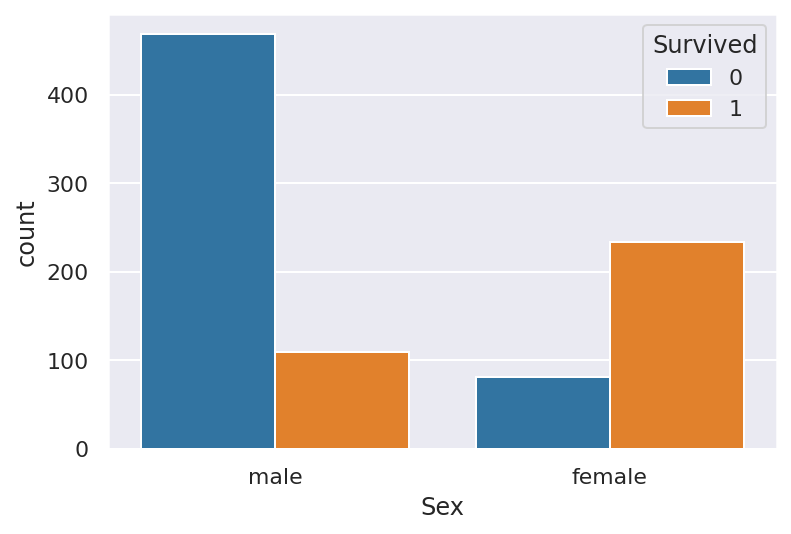

In [18]:
sns.countplot(x='Sex', hue='Survived', data=train);

In [19]:
pd.crosstab(train['Sex'], train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [20]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


##### **Age**

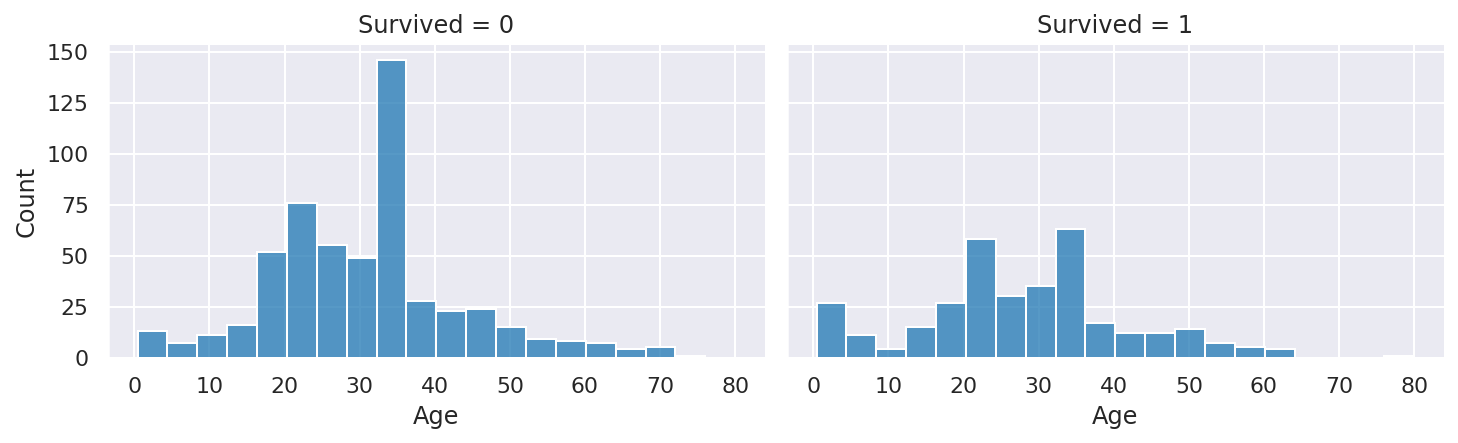

In [21]:
sns.displot(x='Age', col='Survived', kind='hist', bins=20, data=train, height=3.2, aspect=1.6);

In [22]:
# Cut the Age feature to 5 categories
ages = pd.cut(train['Age'], 5)

In [23]:
pd.crosstab(ages, train['Survived'], margins=True)

Survived,0,1,All
Age,,,
"(0.34, 16.336]",47,57,104
"(16.336, 32.252]",232,150,382
"(32.252, 48.168]",221,104,325
"(48.168, 64.084]",39,30,69
"(64.084, 80.0]",10,1,11
All,549,342,891


In [24]:
train[['Survived']].groupby(ages).mean()

,Survived
Age,
"(0.34, 16.336]",0.548077
"(16.336, 32.252]",0.392670
"(32.252, 48.168]",0.320000
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


##### **Pclass**

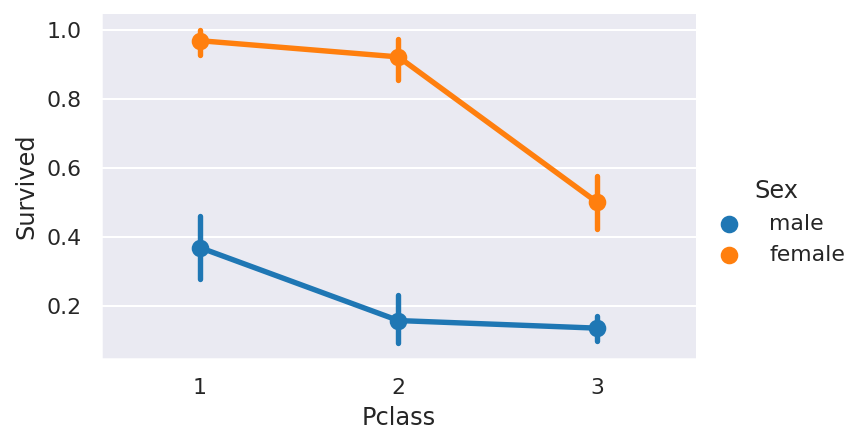

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='point', height=3.2, aspect=1.6);

In [26]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [27]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


##### **Embarked**

In [28]:
pd.crosstab(train['Embarked'], train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
All,549,342,891


In [29]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


##### **SibSp**

In [30]:
pd.crosstab(train['SibSp'], train['Survived'], margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [31]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


##### **Parch**

In [32]:
pd.crosstab(train['Parch'], train['Survived'], margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [33]:
train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


##### **Fare**

In [34]:
# Cut the Fare feature by quantiles
fare = pd.qcut(train['Fare'], 4)

In [35]:
pd.crosstab(fare, train['Survived'], margins=True)

Survived,0,1,All
Fare,,,
"(-0.001, 7.91]",179,44,223
"(7.91, 14.454]",156,68,224
"(14.454, 31.0]",121,101,222
"(31.0, 512.329]",93,129,222
All,549,342,891


In [36]:
train[['Survived']].groupby(by=fare).mean()

,Survived
Fare,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


### Exploratory Data Cross-Analysis

##### **Age + Pclass**

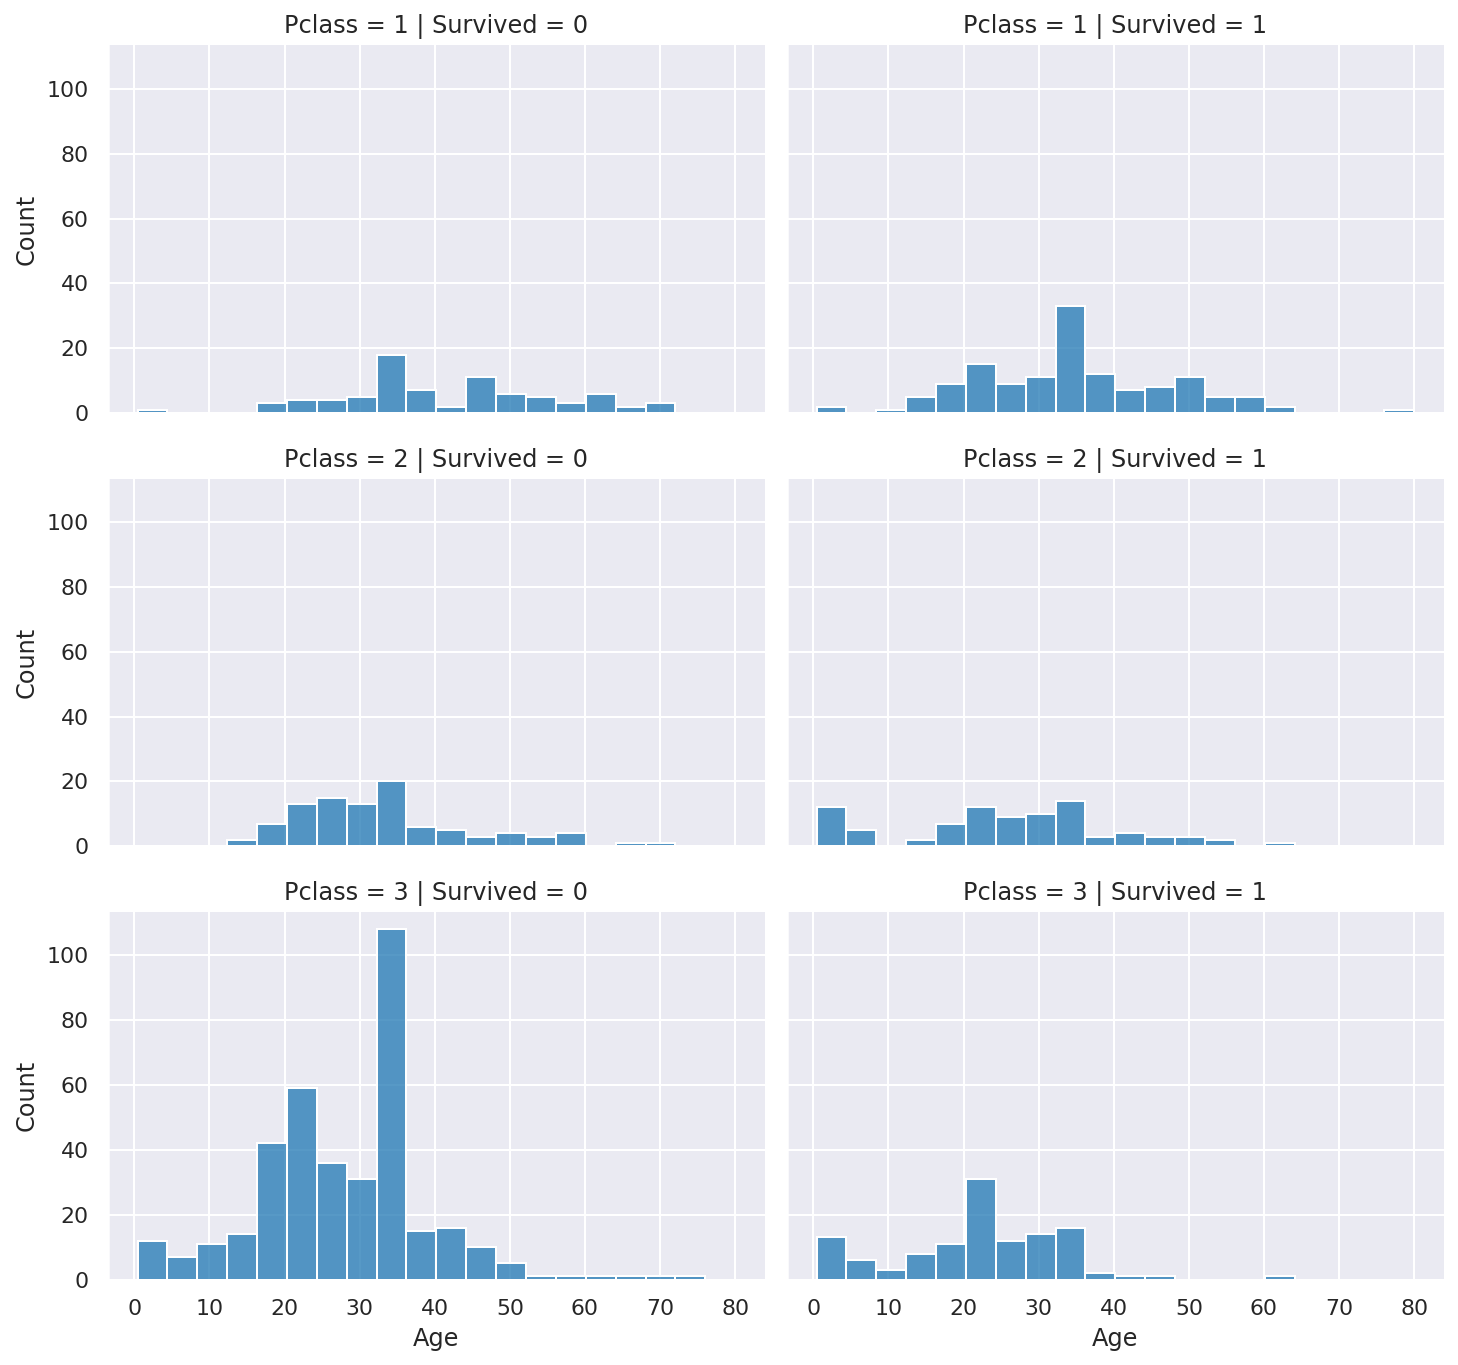

In [37]:
sns.displot(x='Age', row='Pclass', col='Survived', bins=20, data=train, height=3.2, aspect=1.6);

##### **Pclass + Embarked**

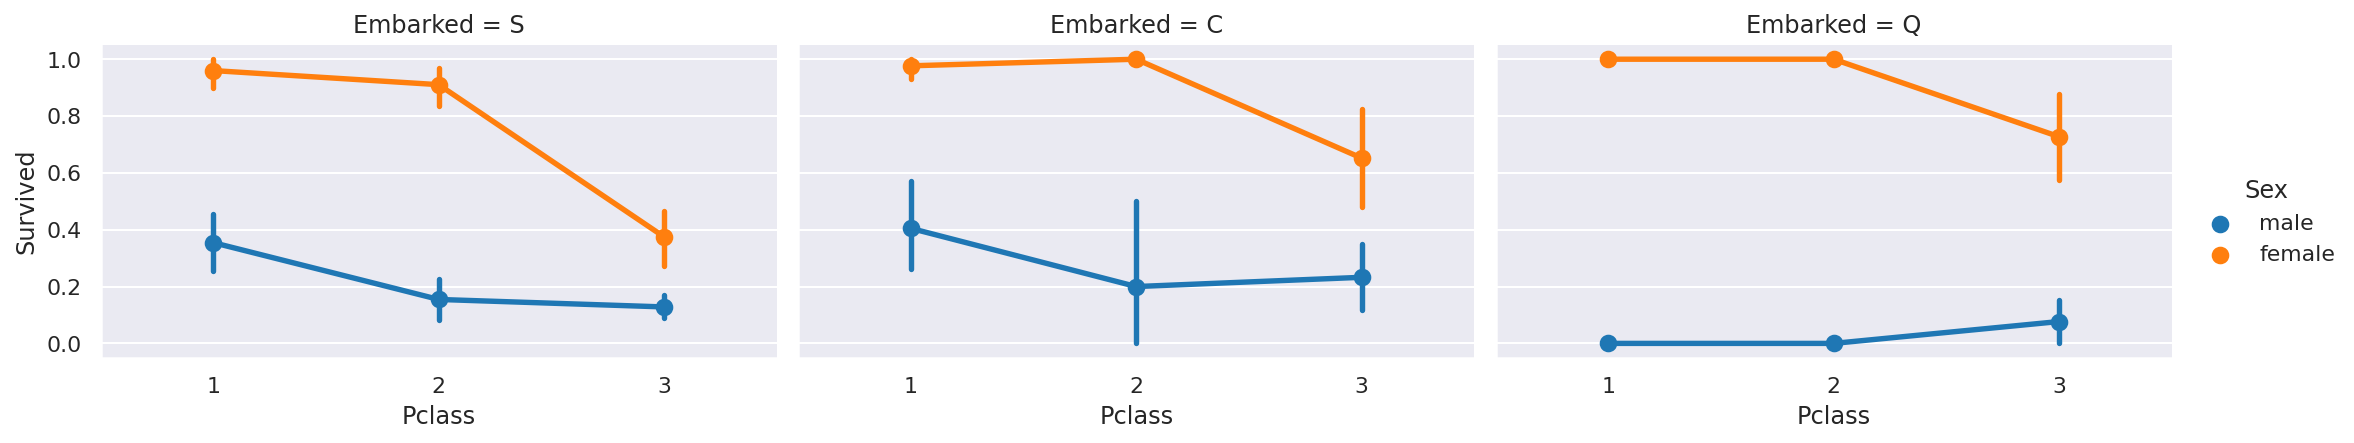

In [38]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train, kind='point', height=3.2, aspect=1.6);

##### **Embarked + Fare**

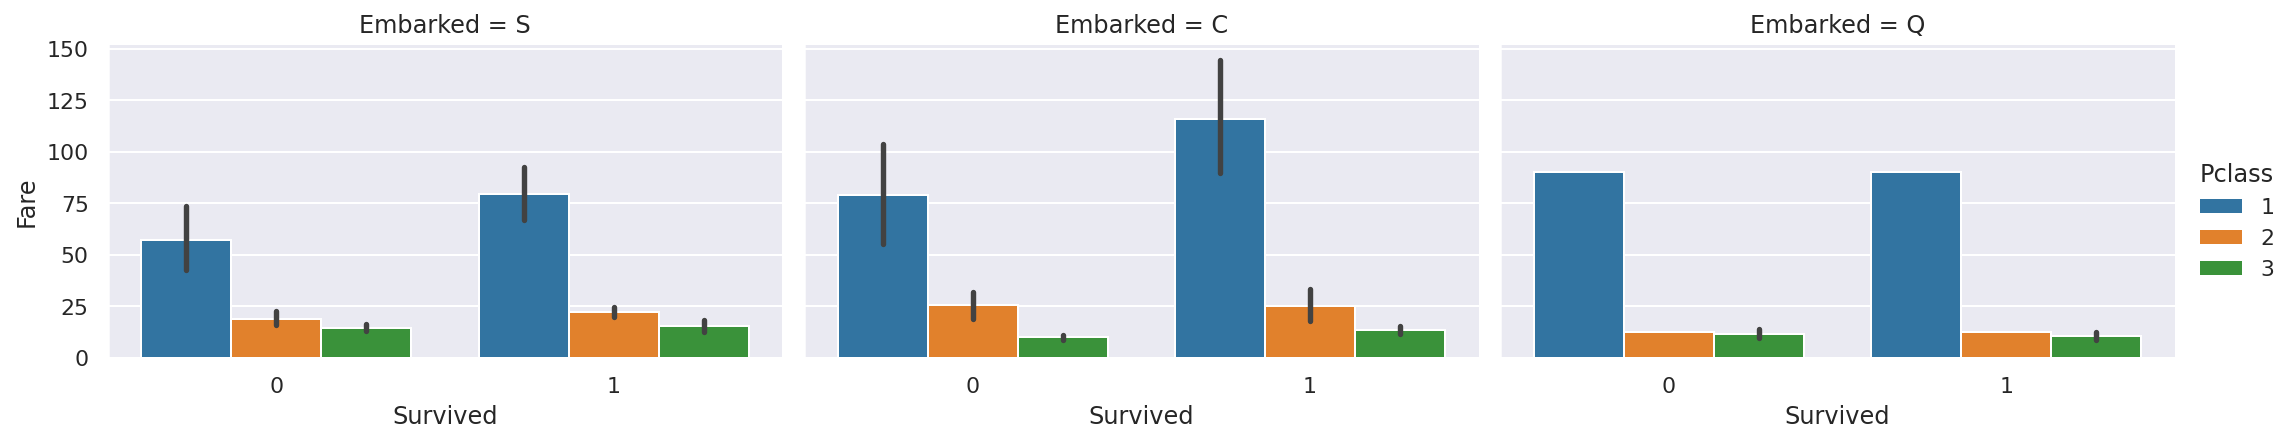

In [39]:
sns.catplot(x='Survived', y='Fare', hue='Pclass', col='Embarked', data=train, kind='bar', height=3.2, aspect=1.6);

### Feature Engineering

##### **New Feature Creating: Fsize**

Combining SibSp and Parch features into a new feature called Fsize, which represents the family size of the passenger on board. After creating Fsize feature, SibSp and Parch features will be dropped

In [40]:
for dataset in data:
    dataset['Fsize'] = dataset['SibSp'] + dataset['Parch']
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [41]:
pd.crosstab(train['Fsize'], train['Survived'], margins=True)

Survived,0,1,All
Fsize,,,
0,374,163,537
1,72,89,161
2,43,59,102
3,8,21,29
4,12,3,15
5,19,3,22
6,8,4,12
7,6,0,6
10,7,0,7


In [42]:
train[['Fsize', 'Survived']].groupby(['Fsize']).mean()

,Survived
Fsize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


#### Ordinal Encoding

##### **Sex, Embarked, Title**

In [43]:
for dataset in data:
      dataset['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
      dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
      dataset['Title'].replace({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':  3, 'Other': 4}, inplace=True)

##### **Fsize**

In [44]:
for dataset in data:    
    dataset.loc[dataset['Fsize'] == 0, 'Fsize'] = 0
    dataset.loc[dataset['Fsize'] == 1, 'Fsize'] = 1
    dataset.loc[dataset['Fsize'] == 2, 'Fsize'] = 2
    dataset.loc[dataset['Fsize'] == 3, 'Fsize'] = 3
    dataset.loc[dataset['Fsize'] >= 4, 'Fsize'] = 4

##### **Age**

In [45]:
for dataset in data:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

    dataset['Age'] = dataset['Age'].astype(np.int64)

##### **Fare**

In [46]:
for dataset in data:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3

  dataset['Fare'] = dataset['Fare'].astype(np.int64)

#### Post Encoding Datasets

In [47]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fsize
0,0,3,0,1,0,0,2,1
1,1,1,1,2,3,1,3,1
2,1,3,1,1,1,0,1,0
3,1,1,1,2,3,0,3,1
4,0,3,0,2,1,0,2,0
5,0,3,0,2,1,2,2,0
6,0,1,0,3,3,0,2,0
7,0,3,0,0,2,0,0,4
8,1,3,1,1,1,0,3,2
9,1,2,1,0,2,1,3,1


In [48]:
test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,Fsize
0,3,0,2,0,2,2,0
1,3,1,2,0,0,3,1
2,2,0,3,1,2,2,0
3,3,0,1,1,0,2,0
4,3,1,1,1,0,3,2
5,3,0,0,1,0,2,0
6,3,1,1,0,2,1,0
7,2,0,1,2,0,2,2
8,3,1,1,0,1,3,0
9,3,0,1,2,0,2,2


## 5. Modeling, Prediction and Interpretation

To build a predictive model, the data will be trained on the following classification algorithms:
- Logistic Regression
- Support Vector Machine
- K-Nearest Neighbors
- Decision Tree
- Random Forest

At the end, feature coefficients will be examined and interpreted to understand their impact on the prediction

### Train Test Definition

In [49]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test  = test
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### Logistic Regression

In [50]:
# Create Logistic Regression object and fit the training data
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Calculate the accuracy on the training data using the method score
logreg_accuracy = logreg.score(X_train, Y_train)
logreg_accuracy

0.7968574635241302

### Support Vector Machine

In [51]:
# Create Support Vector Machine object and fit the training data
svm = SVC()
svm.fit(X_train, Y_train)

# Calculate the accuracy on the training data using the method score
svm_accuracy = svm.score(X_train, Y_train)
svm_accuracy

0.8316498316498316

### K-Nearest Neighbors

In [52]:
# Create K-Nearest Neighbors object and fit the training data
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

# Calculate the accuracy on the training data using the method score
knn_accuracy = knn.score(X_train, Y_train)
knn_accuracy

0.8507295173961841

### Decision Tree

In [53]:
# Create Decision Tree object and fit the training data
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# Calculate the accuracy on the training data using the method score
tree_accuracy = tree.score(X_train, Y_train)
tree_accuracy

0.8877665544332211

### Random Forest

In [54]:
# Create Random Forest object and fit the training data
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, Y_train)

# Calculate the accuracy on the training data using the method score
forest_accuracy = forest.score(X_train, Y_train)
forest_accuracy

0.8877665544332211

### Model Evaluation

In [55]:
# Create dataframe comparing the scores of the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine',
              'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Score': [logreg_accuracy, svm_accuracy, knn_accuracy, tree_accuracy, forest_accuracy]})
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Decision Tree,0.887767
1,Random Forest,0.887767
2,K-Nearest Neighbors,0.850730
3,Support Vector Machine,0.831650
4,Logistic Regression,0.796857


### Prediction

Although the accuracy scores of Decision Tree and Random Forest are the same, it was decided to use Random Forest, because it corrects the Decision Tree's habit of overfitting the training set

In [56]:
Y_pred = forest.predict(X_test)

### Features Interpretation

In [57]:
# Create dataframe with the features and their coefficients
coeffs = pd.DataFrame(columns = ['Feature', 'Coefficient'])
coeffs['Feature'] = X_train.columns
coeffs['Coefficient'] = pd.Series(logreg.coef_[0])

In [58]:
# sort the dataframe by absolute value of the coefficients
coeffs.sort_values(by='Coefficient', key=lambda col: col.abs(), ascending = False, ignore_index=True, inplace = True)
coeffs

,Feature,Coefficient
0,Sex,2.540811
1,Pclass,-0.994058
2,Age,-0.559350
3,Fsize,-0.305956
4,Embarked,0.288323
5,Fare,0.236309
6,Title,-0.142510


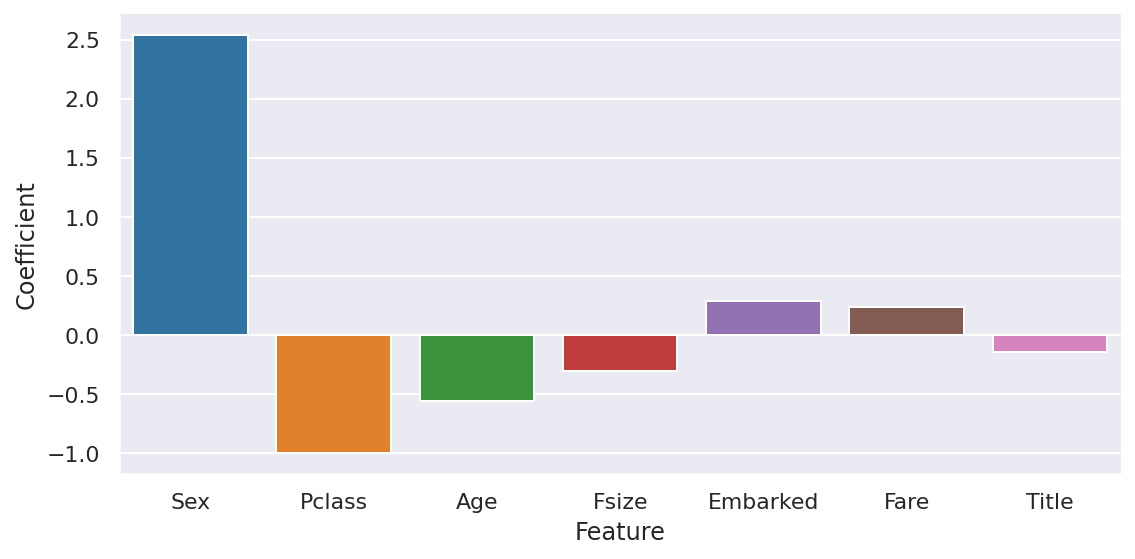

In [59]:
# Distribution of the features' coefficients
sns.catplot(x='Feature', y='Coefficient', data=coeffs, kind='bar', height=4, aspect=2);

### Conclusion

- The Sex feature has the greatest impact on the survival rate. Not surprising when considering that of 34.8% of all females, more than 74% survived, while of 65.2% of all males, less than 19% survived
- The Pclass feature has the greatest negative impact on the survival rate. The lower the ticket class, the lower the chance to survive
- The Age feature has a relatively low coefficient. This is probably due to the fact that it was splitted into only 5 categories of 16 years each, and increasing the number of categories could have increased the coefficient
- Surprisingly, the Fsize feature has a negative impact on the survival rate. From the analysis of this feature, it was seen that the larger the family size, the higher the survival rate. The coefficient of the feature indicates the opposite. Probably another feature should have been created, consisting of two categories - whether the passenger travels alone or not
- The Embarked and Fare features confirm the assumption that wealthier passengers have a higher survival rate, although these features do not have a strong enough impact on the survival rate
- The Title feature also confirms the assumption that children and females have a higher survival rate. This feature has the weakest impact on the survival rate